In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Telco_Cusomer_Churn.csv to Telco_Cusomer_Churn.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Telco_Cusomer_Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()
df.describe(include='all')
for col in df.columns:
    print(f"\n--- Cột: {col} ---")
    print(df[col].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (df.isna().sum() / len(df) * 100).round(2)
pd.DataFrame({'Missing Values': missing, 'Percent %': missing_percent})

,Missing Values,Percent %
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


**1. DỰ BÁO CHURN ĐỂ CHỦ ĐỘNG GIỮ CHÂN ( chạy sau khi chạy phần Dashboard)**

*Label*

In [ ]:
import pandas as pd


# 1. Chuyển biến số sang float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # convert, lỗi -> NaN
df['TotalCharges'].fillna(0, inplace=True)

# 2. Xử lý các biến categorical
# Biến nhị phân có thể map Yes/No -> 1/0
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0, 'Female':0, 'Male':1})

# 3. Các biến có nhiều giá trị: One-hot encoding
multi_value_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# Nếu muốn, trước hết xử lý giá trị đặc biệt 'No internet service' hoặc 'No phone service' -> 'No'
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service':'No', 'No phone service':'No'})

# One-hot encoding
df = pd.get_dummies(df, columns=multi_value_cols, drop_first=True)  # drop_first để tránh dummy trap

# Kết quả: tất cả biến số đã là float, categorical nhiều giá trị đã one-hot
print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   OnlineBackup_Yes  DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
0              True                 False            False            Fal

/tmp/ipython-input-2357697731.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
# Chuyển True/False -> 1/0
bool_cols = df.select_dtypes('bool').columns
df[bool_cols] = df[bool_cols].astype(int)


*Xử lý Scale*

In [ ]:
from sklearn.preprocessing import StandardScaler

# Các cột numeric cần scale
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Khởi tạo scaler
scaler = StandardScaler()

# Scale dữ liệu
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Kiểm tra kết quả
print(df[numeric_cols].head())


     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.992611
1  0.066327       -0.259629     -0.172165
2 -1.236724       -0.362660     -0.958066
3  0.514251       -0.746535     -0.193672
4 -1.236724        0.197365     -0.938874


*Threshold*

ROC AUC: 0.82328140742463


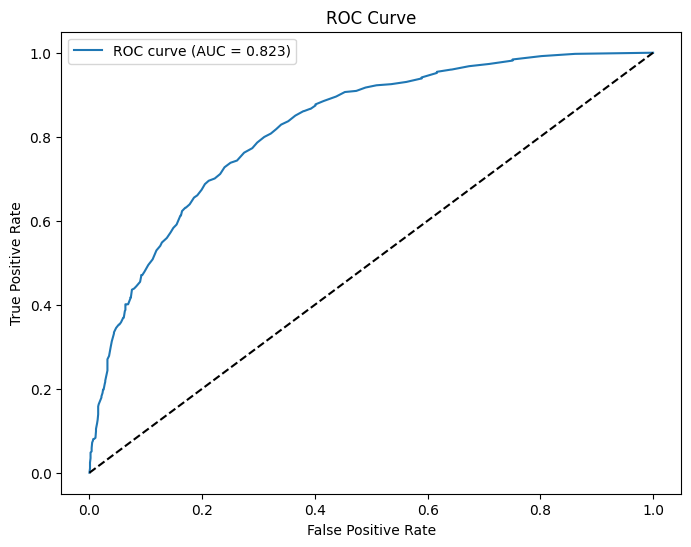

Best Threshold = 0.25


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Giả sử df là dataframe đã xử lý, scale xong
X1 = df.drop(['customerID','Churn'], axis=1)
y1 = df['Churn']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

# Fit Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán xác suất cho lớp 1
y_probs = model.predict_proba(X_test)[:, 1]

# Tính FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Tính AUC
auc = roc_auc_score(y_test, y_probs)
print("ROC AUC:", auc)

# Vẽ ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Chọn threshold tối ưu (Youden's J)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print("Best Threshold =", best_thresh)


*SMOTE - df2*

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
# 0️⃣ Import thư viện
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt

# 1️⃣ Tạo bản copy df2
df2 = df.copy()

# 2️⃣ Chuẩn bị dữ liệu từ df2
X = df2.drop(['customerID','Churn'], axis=1)
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3️⃣ SMOTEENN cân bằng dữ liệu train
smote = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 4️⃣ Chuẩn bị các model
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# 5️⃣ Hàm tính threshold tối ưu và metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:,1]

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    # Predict với threshold tối ưu
    y_pred = (y_probs >= best_thresh).astype(int)

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    return {
        'Best Threshold': best_thresh,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc
    }

# 6️⃣ Chạy tất cả model và lưu kết quả
results = {}
for name, model in models.items():
    print(f'Running {name}...')
    results[name] = evaluate_model(model, X_train_bal, y_train_bal, X_test, y_test)

# 7️⃣ Hiển thị kết quả
results_df = pd.DataFrame(results).T
print(results_df)


Running Naive Bayes...
Running Decision Tree...
Running Random Forest...
Running XGBoost...
Running LightGBM...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:32:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3013, number of negative: 2243
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 5256, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.573250 -> initscore=0.295122
[LightGBM] [Info] Start training from score 0.295122
Running CatBoost...
               Best Threshold  Precision    Recall        F1   ROC-AUC
Naive Bayes          0.936836   0.525140  0.754011  0.619100  0.819008
Decision Tree        1.000000   0.482982  0.796791  0.601413  0.744289
Random Forest        0.520000   0.502408  0.836898  0.627884  0.830249
XGBoost              0.544260   0.492754  0.818182  0.615075  0.

SMOTE-ADASYN - df3

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
df3=df.copy()
# 2️⃣ Chuẩn bị dữ liệu
X = df3.drop(['customerID','Churn'], axis=1)
y = df3['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3️⃣ SMOTE + ADASYN cân bằng dữ liệu train
smote = SMOTEENN(random_state=42)  # SMOTEENN kết hợp oversample + clean noise
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

adasyn = ADASYN(random_state=42)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train_res, y_train_res)

# 4️⃣ Chuẩn bị các model
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# 5️⃣ Hàm tính threshold tối ưu và metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:,1]

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    # Predict với threshold tối ưu
    y_pred = (y_probs >= best_thresh).astype(int)

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    return {
        'Best Threshold': best_thresh,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc
    }

# 6️⃣ Chạy tất cả model và lưu kết quả
results = {}
for name, model in models.items():
    print(f'Running {name}...')
    results[name] = evaluate_model(model, X_train_bal, y_train_bal, X_test, y_test)

# 7️⃣ Hiển thị kết quả
results_df = pd.DataFrame(results).T
print(results_df)

Running Naive Bayes...
Running Decision Tree...
Running Random Forest...
Running XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:03:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Running LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3013, number of negative: 3078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 6091, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494664 -> initscore=-0.021344
[LightGBM] [Info] Start training from score -0.021344
Running CatBoost...
               Best Threshold  Precision    Recall        F1   ROC-AUC
Naive Bayes          0.811625   0.523191  0.754011  0.617744  0.818985
Decision Tree        1.000000   0.477124  0.780749  0.592292  0.735785
Random Forest        0.520000   0.526132  0.807487  0.637131  0.831606
XGBoost              0.528394   0.511036  

*CLASS WEIGHT - df4*

In [ ]:
# 0️⃣ Import thư viện
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt

# 1️⃣ Tạo bản copy df4
df4 = df.copy()

# 2️⃣ Chuẩn bị dữ liệu
X = df4.drop(['customerID','Churn'], axis=1)
y = df4['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3️⃣ Chuẩn bị các model với class_weight
models = {
    'Naive Bayes': GaussianNB(),  # không hỗ trợ class_weight
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(), random_state=42),
    'LightGBM': lgb.LGBMClassifier(class_weight='balanced', random_state=42),
    'CatBoost': CatBoostClassifier(class_weights=[1, (y_train==0).sum()/(y_train==1).sum()], verbose=0, random_state=42)
}

# 4️⃣ Hàm tính threshold tối ưu và metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:,1]

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    # Predict với threshold tối ưu
    y_pred = (y_probs >= best_thresh).astype(int)

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    return {
        'Best Threshold': best_thresh,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc
    }

# 5️⃣ Chạy tất cả model và lưu kết quả
results = {}
for name, model in models.items():
    print(f'Running {name}...')
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

# 6️⃣ Hiển thị kết quả
results_df = pd.DataFrame(results).T
print(results_df)


Running Naive Bayes...
Running Decision Tree...
Running Random Forest...
Running XGBoost...
Running LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:04:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Running CatBoost...
               Best Threshold  Precision    Recall        F1   ROC-AUC
Naive Bayes          0.682571   0.537402  0.729947  0.619048  0.823470
Decision Tree        1.000000   0.493113  0.478610  0.485753  0.650164
Random Forest        0.296486   0.531429  0.745989  0.620690  0.825608
XGBoost              0.433964   0.536346  0.729947  0.618347  0.821065
LightGBM             0.426558   0.515464  0.802139  0.627615  0.832105
CatBoost             0.394294   0.500805  0.831551  0.625126  0.839431


*HYPERPARAMETERS - SMOTEENN df5*

In [ ]:
# 0️⃣ Import thư viện
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# 1️⃣ Tạo df5
df5 = df.copy()

# 2️⃣ Chuẩn bị dữ liệu
X = df5.drop(['customerID','Churn'], axis=1)
y = df5['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3️⃣ SMOTEENN cân bằng dữ liệu
smote = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 4️⃣ Chuẩn bị model và hyperparameters
models_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3,5,7,10,None],
            'min_samples_split': [2,5,10],
            'min_samples_leaf': [1,2,5],
            'criterion': ['gini','entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100,200,300],
            'max_depth': [5,7,10,None],
            'min_samples_split': [2,5,10],
            'min_samples_leaf': [1,2,4],
            'criterion': ['gini','entropy']
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [100,200,300],
            'max_depth': [3,5,7],
            'learning_rate': [0.01,0.05,0.1],
            'subsample': [0.7,0.8,1],
            'colsample_bytree':[0.7,0.8,1]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(random_state=42),
        'params': {
            'n_estimators': [100,200,300],
            'max_depth': [3,5,7,-1],
            'learning_rate':[0.01,0.05,0.1],
            'num_leaves':[20,31,50],
            'subsample':[0.7,0.8,1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0, random_state=42),
        'params': {
            'iterations':[200,400,600],
            'depth':[3,5,7],
            'learning_rate':[0.01,0.05,0.1],
            'l2_leaf_reg':[1,3,5]
        }
    }
}

# 5️⃣ Hàm tìm hyperparameters tốt nhất
def tune_model(model, params, X_train, y_train):
    search = RandomizedSearchCV(
        model,
        param_distributions=params,
        n_iter=10,
        scoring='f1',
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# 6️⃣ Chạy tuning cho tất cả model
best_models = {}
for name, mp in models_params.items():
    print(f"Tuning {name}...")
    best_model, best_params = tune_model(mp['model'], mp['params'], X_train_bal, y_train_bal)
    best_models[name] = best_model
    print(f"Best params for {name}: {best_params}\n")

# 7️⃣ Tính threshold tối ưu và metrics như trước
def evaluate_model(model, X_test, y_test):
    y_probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    y_pred = (y_probs >= best_thresh).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)
    return {'Best Threshold':best_thresh, 'Precision':precision, 'Recall':recall, 'F1':f1, 'ROC-AUC':auc}

results = {}
for name, model in best_models.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_test, y_test)

results_df = pd.DataFrame(results).T
print(results_df)


Tuning Decision Tree...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}

Tuning Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}

Tuning XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:11:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1}

Tuning LightGBM...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3013, number of negative: 2243
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 5256, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.573250 -> initscore=0.295122
[LightGBM] [Info] Start training from score 0.295122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

KẾT LUẬN
Ưu tiên bắt được nhiều churn -- > chọn catboost của class weight

Running Naive Bayes...
Running Decision Tree...
Running Random Forest...
Running XGBoost...
Running LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:33:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Running CatBoost...
               Best Threshold  Precision    Recall        F1   ROC-AUC
Naive Bayes          0.682571   0.537402  0.729947  0.619048  0.823470
Decision Tree        1.000000   0.493113  0.478610  0.485753  0.650164
Random Forest        0.296486   0.531429  0.745989  0.620690  0.825608
XGBoost              0.433964   0.536346  0.729947  0.618347  0.821065
LightGBM             0.426558   0.515464  0.802139  0.627615  0.832105
CatBoost             0.394294   0.500805  0.831551  0.625126  0.839431


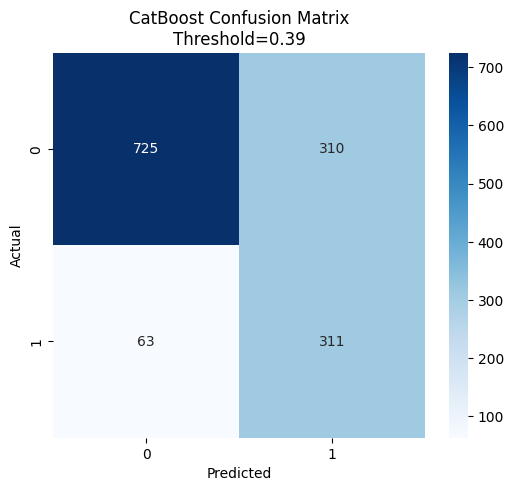

In [ ]:
# 0️⃣ Import thư viện
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# 1️⃣ Tạo bản copy df_new
df_new = df.copy()  # Hoặc df_new = df_new nếu bạn đã có df_new
df_new = df_new.copy()  # đảm bảo là copy độc lập

# 2️⃣ Chuẩn bị dữ liệu
X = df_new.drop(['customerID','Churn'], axis=1)
y = df_new['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3️⃣ Chuẩn bị các model với class_weight
models = {
    'Naive Bayes': GaussianNB(),  # không hỗ trợ class_weight
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                 scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(), random_state=42),
    'LightGBM': lgb.LGBMClassifier(class_weight='balanced', random_state=42),
    'CatBoost': CatBoostClassifier(class_weights=[1, (y_train==0).sum()/(y_train==1).sum()],
                                   verbose=0, random_state=42)
}

# 4️⃣ Hàm tính threshold tối ưu và metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:,1]

    # ROC curve để tìm threshold tối ưu
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    # Predict với threshold tối ưu
    y_pred = (y_probs >= best_thresh).astype(int)

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_probs)

    return {
        'Best Threshold': best_thresh,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': auc
    }

# 5️⃣ Chạy tất cả model và lưu kết quả
results = {}
for name, model in models.items():
    print(f'Running {name}...')
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

# 6️⃣ Hiển thị kết quả
results_df = pd.DataFrame(results).T
print(results_df)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve
cat_model = models['CatBoost']
# Giả sử model CatBoost là 'cat_model'
cat_model.fit(X_train, y_train)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test)[:, 1]

# Tìm threshold tối ưu theo Youden's J
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

# Predict với threshold tối ưu
y_pred = (y_probs >= best_thresh).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'CatBoost Confusion Matrix\nThreshold={best_thresh:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**True Negative (TN) = 725**

Số khách hàng không churn (0) được dự đoán đúng là không churn.

Đây là kết quả đúng với lớp "0".

**False Positive (FP) = 310**

Số khách hàng không churn (0) nhưng model dự đoán là churn (1).

Đây là lỗi dự đoán churn quá mức, gây cảnh báo sai.

False Negative (FN) = 63 **bold text**

Số khách hàng churn (1) nhưng model dự đoán là không churn (0).

Đây là lỗi bỏ sót churn, nguy hiểm vì khách hàng thực sự churn nhưng bạn không nhận ra.

**True Positive (TP) = 311**

Số khách hàng churn (1) được dự đoán đúng là churn.

Đây là kết quả đúng với lớp "1".

***CatBoost này ưu tiên bắt churn hơn là dự đoán chính xác tuyệt đối, phù hợp với chiến lược giữ khách hàng quan trọng.***

**2. DASHBOARD RỦI RO KHÁCH HÀNG**

In [ ]:
import plotly.express as px

# Đếm số lượng churn tổng thể
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Vẽ donut chart
fig = px.pie(
    churn_counts,
    names='Churn',
    values='Count',
    hole=0.4,  # tạo donut
    color='Churn',
    color_discrete_map={'Yes':'5D2F77', 'No':'F5D2D2'},  # đỏ cho churn, xanh cho không churn
    title='Tổng quan tỷ lệ khách hàng Churn vs Không Churn'
)

fig.update_traces(
    textinfo='percent+label',  # hiển thị % + nhãn
    textfont_size=14
)
fig.update_layout(
    title={
    'text': 'Tổng quan tỷ lệ khách hàng Churn vs Không Churn',
    'x': 0.5,  # căn giữa tiêu đề
    'xanchor': 'center',
    'yanchor': 'top'
    },
    showlegend=False,
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=18, showarrow=False)]
)
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# 🧩 Chuẩn bị dữ liệu
df['SeniorCitizen_cat'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

df_melt = df.melt(
    id_vars='Churn',
    value_vars=['gender', 'SeniorCitizen_cat', 'Partner', 'Dependents'],
    var_name='Feature',
    value_name='Category'
)

# 🎨 Tùy chỉnh nhãn và màu riêng cho từng feature
feature_label_map = {
    'gender': {'Male': 'Male', 'Female': 'Female'},
    'Partner': {'Yes': 'Have Partner', 'No': 'No Partner'},
    'Dependents': {'Yes': 'Have Dependent', 'No': 'No Dependent'},
    'SeniorCitizen_cat': {'Yes': 'Senior Citizen', 'No': 'Not Senior Citizen'}
}

# 🌈 Màu pastel mới
feature_color_map = {
    'gender': {'Male': '#BDE3C3', 'Female': '#F8F7BA'},
    'Partner': {'Have Partner': '#BDE3C3', 'No Partner': '#F8F7BA'},
    'Dependents': {'Have Dependent': '#BDE3C3', 'No Dependent': '#F8F7BA'},
    'SeniorCitizen_cat': {'Senior Citizen': '#BDE3C3', 'Not Senior Citizen': '#F8F7BA'}
}

# Danh sách feature
features = df_melt['Feature'].unique()
fig = go.Figure()

# 🧮 Tính tỷ lệ churn (%) cho từng Category
for i, feature in enumerate(features):
    df_temp = df_melt[df_melt['Feature'] == feature].copy()
    df_temp['Category'] = df_temp['Category'].map(feature_label_map[feature])

    # Đếm churn và tổng
    counts = df_temp.groupby(['Category', 'Churn']).size().unstack(fill_value=0)
    counts['Total'] = counts.sum(axis=1)
    counts['Churn_rate'] = counts['Yes'] / counts['Total'] * 100
    counts = counts.reset_index()

    categories = counts['Category'].unique()
    colors = feature_color_map[feature]

    for cat in categories:
        subset = counts[counts['Category'] == cat]
        fig.add_bar(
            x=[cat],
            y=subset['Churn_rate'],
            name=cat,
            marker_color=colors[cat],
            visible=(i == 0)
        )

# Số trace mỗi feature
n_cat = len(counts['Category'].unique())

# 🪄 Dropdown menu bật/tắt trace đúng feature
buttons = []
for i, feature in enumerate(features):
    visible = [False] * (len(features) * n_cat)
    start = i * n_cat
    end = start + n_cat
    for j in range(start, end):
        visible[j] = True
    buttons.append(dict(
        label=feature,
        method='update',
        args=[{'visible': visible},
              {'title': f'Tỷ lệ khách hàng rời bỏ (%) theo {feature}'}]
    ))

# ✨ Layout tổng thể
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction='down',
        x=1.25,
        y=1.15,
        xanchor='left',
        yanchor='top'
    )],
    barmode='group',
    legend_title_text='Phân loại khách hàng',
    title=f'Tỷ lệ khách hàng rời bỏ (%) theo {features[0]}',
    xaxis_title='Nhóm khách hàng',
    yaxis_title='Tỷ lệ rời bỏ (%)',
    plot_bgcolor='white',
    font=dict(family='Inter, sans-serif', size=14, color='#2E2E2E')
)

fig.show()


In [ ]:
import pandas as pd

# Giả sử df là dữ liệu của bạn

# Pivot table: số lượng khách hàng theo Contract và Churn
pivot_table_count = pd.pivot_table(
    df,
    index='Contract',
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

print("Số lượng khách hàng theo Contract và Churn:")
print(pivot_table_count)

# Nếu muốn % churn theo Contract
pivot_table_percent = pivot_table_count.div(pivot_table_count.sum(axis=1), axis=0) * 100
print("\nTỷ lệ phần trăm khách hàng theo Contract và Churn (%):")
print(pivot_table_percent)

# Pivot nhiều cấp: Contract + PaperlessBilling
pivot_table_multi = pd.pivot_table(
    df,
    index=['Contract','PaperlessBilling'],
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

print("\nSố lượng khách hàng theo Contract + PaperlessBilling và Churn:")
print(pivot_table_multi)



Số lượng khách hàng theo Contract và Churn:
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

Tỷ lệ phần trăm khách hàng theo Contract và Churn (%):
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858

Số lượng khách hàng theo Contract + PaperlessBilling và Churn:
Churn                              No   Yes
Contract       PaperlessBilling            
Month-to-month No                 883   406
               Yes               1337  1249
One year       No                 625    48
               Yes                682   118
Two year       No                 895    15
               Yes                752    33


In [ ]:
import pandas as pd

# --- Pivot table: Số lượng khách hàng theo Contract và Churn ---
pivot_table_count = pd.pivot_table(
    df,
    index='Contract',
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

print("📊 Số lượng khách hàng theo Contract và Churn:")
display(
    pivot_table_count
    .style
    .background_gradient(cmap='Blues')  # Màu xanh dương nhẹ
    .set_caption("Số lượng khách hàng theo Contract và Churn")
    .format("{:,.0f}")  # Không có phần thập phân
)

# --- % churn theo Contract ---
pivot_table_percent = pivot_table_count.div(pivot_table_count.sum(axis=1), axis=0) * 100

print("\n📈 Tỷ lệ phần trăm khách hàng theo Contract và Churn (%):")
display(
    pivot_table_percent
    .style
    .background_gradient(cmap='YlOrRd')  # Vàng → cam → đỏ
    .set_caption("Tỷ lệ phần trăm khách hàng theo Contract và Churn")
    .format("{:.1f}%")  # Hiển thị 1 chữ số sau dấu phẩy
)

# --- Pivot nhiều cấp: Contract + PaperlessBilling ---
pivot_table_multi = pd.pivot_table(
    df,
    index=['Contract', 'PaperlessBilling'],
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

print("\n🧩 Số lượng khách hàng theo Contract + PaperlessBilling và Churn:")
display(
    pivot_table_multi
    .style
    .background_gradient(cmap='PuBuGn')  # Xanh tím nhẹ
    .set_caption("Số lượng khách hàng theo Contract + PaperlessBilling và Churn")
    .format("{:,.0f}")
)


📊 Số lượng khách hàng theo Contract và Churn:


Churn,No,Yes
Contract,,
Month-to-month,"2,220","1,655"
One year,"1,307",166
Two year,"1,647",48



📈 Tỷ lệ phần trăm khách hàng theo Contract và Churn (%):


Churn,No,Yes
Contract,,
Month-to-month,57.3%,42.7%
One year,88.7%,11.3%
Two year,97.2%,2.8%



🧩 Số lượng khách hàng theo Contract + PaperlessBilling và Churn:


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# --- Pivot 1: Số lượng khách hàng theo Contract và Churn ---
pivot_table_count = pd.pivot_table(
    df,
    index='Contract',
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

# --- % churn theo Contract ---
pivot_table_percent = pivot_table_count.div(pivot_table_count.sum(axis=1), axis=0) * 100

# --- Pivot nhiều cấp: Contract + PaperlessBilling ---
pivot_table_multi = pd.pivot_table(
    df,
    index=['Contract', 'PaperlessBilling'],
    columns='Churn',
    values='customerID',
    aggfunc='count',
    fill_value=0
)

#  Gradient pastel: nhấn mạnh khi giá trị cao
def pastel_gradient(values, low='#E5F4E7', high='#A8D8B9'):
    vals = np.array(values, dtype=float)
    norm = (vals - vals.min()) / (vals.max() - vals.min() + 1e-9)
    colors = []
    for v in norm:
        # Trộn màu pastel nhẹ, tăng độ đậm với giá trị cao
        r1, g1, b1 = (229, 244, 231)
        r2, g2, b2 = (168, 216, 185)
        r = int(r1 + (r2 - r1) * v)
        g = int(g1 + (g2 - g1) * v)
        b = int(b1 + (b2 - b1) * v)
        colors.append(f'rgb({r},{g},{b})')
    return colors

# ================== BẢNG 1: COUNT ==================
fig_count = go.Figure(
    data=[go.Table(
        header=dict(
            values=["Contract"] + list(pivot_table_count.columns),
            fill_color='#4C6A9B',
            align='center',
            font=dict(color='white', size=14, family='Inter')
        ),
        cells=dict(
            values=[pivot_table_count.index] + [pivot_table_count[col] for col in pivot_table_count.columns],
            fill_color=[
                ['#F9F9FB'] * len(pivot_table_count)
            ] + [
                pastel_gradient(pivot_table_count[col].values) for col in pivot_table_count.columns
            ],
            align='center',
            font=dict(color='#2F2F2F', size=13, family='Inter')
        )
    )]
)
fig_count.update_layout(
    title=" Customer Count by Contract & Churn",
    title_x=0.5,
    title_font=dict(color='#4C6A9B', size=20, family='Inter'),
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='#F9F9FB'
)

# ================== BẢNG 2: PERCENT ==================
fig_percent = go.Figure(
    data=[go.Table(
        header=dict(
            values=["Contract"] + list(pivot_table_percent.columns),
            fill_color='#4C6A9B',
            align='center',
            font=dict(color='white', size=14, family='Inter')
        ),
        cells=dict(
            values=[pivot_table_percent.index] + [
                pivot_table_percent[col].round(1).astype(str) + "%" for col in pivot_table_percent.columns
            ],
            fill_color=[
                ['#F9F9FB'] * len(pivot_table_percent)
            ] + [
                pastel_gradient(pivot_table_percent[col].values) for col in pivot_table_percent.columns
            ],
            align='center',
            font=dict(color='#2F2F2F', size=13, family='Inter')
        )
    )]
)
fig_percent.update_layout(
    title=" Customer Churn Rate (%) by Contract",
    title_x=0.5,
    title_font=dict(color='#4C6A9B', size=20, family='Inter'),
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='#F9F9FB'
)

# ================== BẢNG 3: MULTI ==================
fig_multi = go.Figure(
    data=[go.Table(
        header=dict(
            values=["Contract", "PaperlessBilling"] + list(pivot_table_multi.columns),
            fill_color='#4C6A9B',
            align='center',
            font=dict(color='white', size=14, family='Inter')
        ),
        cells=dict(
            values=[
                pivot_table_multi.index.get_level_values('Contract'),
                pivot_table_multi.index.get_level_values('PaperlessBilling')
            ] + [pivot_table_multi[col] for col in pivot_table_multi.columns],
            fill_color=[
                ['#F9F9FB'] * len(pivot_table_multi),
                ['#F9F9FB'] * len(pivot_table_multi)
            ] + [
                pastel_gradient(pivot_table_multi[col].values) for col in pivot_table_multi.columns
            ],
            align='center',
            font=dict(color='#2F2F2F', size=13, family='Inter')
        )
    )]
)
fig_multi.update_layout(
    title=" Customer Count by Contract + PaperlessBilling & Churn",
    title_x=0.5,
    title_font=dict(color='#4C6A9B', size=20, family='Inter'),
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='#F9F9FB'
)

#  Hiển thị
fig_count.show()
fig_percent.show()
fig_multi.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Tính số lượng churn = Yes và tổng số khách hàng trong mỗi nhóm
grouped = df.groupby(['Contract', 'PaperlessBilling']).agg(
    total_customers=('customerID', 'count'),
    churn_count=('Churn', lambda x: (x == 'Yes').sum())
).reset_index()

# Đổi nhãn PaperlessBilling cho rõ ràng
grouped['PaperlessBilling'] = grouped['PaperlessBilling'].map({
    'Yes': 'Paperless Billing',
    'No': 'Traditional Billing'
})

# Tính % churn
grouped['Churn_%'] = grouped['churn_count'] / grouped['total_customers'] * 100

# Vẽ bar chart
fig = px.bar(
    grouped,
    x='Contract',
    y='Churn_%',
    color='PaperlessBilling',
    barmode='group',
    text='Churn_%',
    labels={
        'Churn_%': '% Churn',
        'Contract': 'Loại hợp đồng',
        'PaperlessBilling': 'Hình thức hóa đơn'
    },
    title='Tỷ lệ Churn theo Contract và Hình thức Billing',
    color_discrete_map={
        'Paperless Billing': '#F5D2D2',
        'Traditional Billing': '#A3CCDA'
    }
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(yaxis=dict(range=[0, 55]))
fig.show()

# Tính % churn theo PaymentMethod
grouped_payment = df.groupby('PaymentMethod').agg(
    total_customers=('customerID', 'count'),
    churn_count=('Churn', lambda x: (x == 'Yes').sum())
).reset_index()

grouped_payment['Churn_%'] = grouped_payment['churn_count'] / grouped_payment['total_customers'] * 100

# Vẽ line chart
fig = px.line(
    grouped_payment,
    x='PaymentMethod',
    y='Churn_%',
    markers=True,
    text='Churn_%',
    labels={'Churn_%': '% Churn', 'PaymentMethod': 'Phương thức thanh toán'},
    title='% Churn theo Phương thức thanh toán',
    color_discrete_sequence=['#5D2F77']
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='top center')
fig.update_layout(yaxis=dict(range=[0, max(grouped_payment['Churn_%']) + 10]))
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Giả sử df là dữ liệu gốc với các cột: InternetService, PhoneService, Churn

# Chuẩn hóa PhoneService thành 2 giá trị: Có / Không
df['PhoneFlag'] = df['PhoneService'].apply(lambda x: 'Có Phone' if x == 'Yes' else 'Không Phone')

# Tính % churn
grouped = df.groupby(['InternetService','PhoneFlag']).agg(
    total=('customerID','count'),
    churn_count=('Churn', lambda x: (x=='Yes').sum())
).reset_index()

grouped['Churn_%'] = grouped['churn_count'] / grouped['total'] * 100

# Vẽ bar chart
fig = px.bar(
    grouped,
    x='InternetService',
    y='Churn_%',
    color='PhoneFlag',
    barmode='group',
    text='Churn_%',
    color_discrete_map={'Có Phone':'#394B8E','Không Phone':'#ED6F86'},
    labels={'InternetService':'Internet Service','Churn_%':'% Churn'},
    title='% Churn theo Internet Service và Phone Service'
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(yaxis=dict(range=[0, grouped['Churn_%'].max() + 10]))
fig.show()


**2. PHÂN TÍCH GIÁ TRỊ VÒNG ĐỜI KHÁCH HÀNG**

In [ ]:
df_clv = df[['MonthlyCharges','TotalCharges','tenure','Churn']].copy()
# Chuyển TotalCharges sang kiểu số, ép lỗi thành NaN nếu có ký tự lạ
df_clv['TotalCharges'] = pd.to_numeric(df_clv['TotalCharges'], errors='coerce')



In [ ]:
df_clv.head()

,MonthlyCharges,TotalCharges,tenure,Churn
0,29.85,29.85,1,No
1,56.95,1889.50,34,No
2,53.85,108.15,2,Yes
3,42.30,1840.75,45,No
4,70.70,151.65,2,Yes


In [ ]:
import plotly.express as px

# Tính CLV (nếu chưa có)
df_clv['CLV'] = df_clv['MonthlyCharges'] * df_clv['tenure']

# --- Tính Tổng phí trung bình theo Tenure ---
avg_total = df_clv.groupby('tenure')['TotalCharges'].mean().reset_index()

# Thêm cột Rolling Mean (trung bình trượt 6 tháng)
avg_total['Rolling'] = avg_total['TotalCharges'].rolling(window=6).mean()

# --- Biểu đồ Area ---
fig_line = px.area(
    avg_total,
    x='tenure',
    y='TotalCharges',
    title='Tổng phí trung bình theo Thời gian gắn bó (Tenure)',
    labels={
        'tenure': 'Thời gian gắn bó (tháng)',
        'TotalCharges': 'Tổng phí trung bình'
    },
)

# Màu và vùng nền
fig_line.update_traces(
    line_color='#065570',
    fillcolor='rgba(248,247,186,0.6)',
    hovertemplate='Tenure: %{x}<br>Tổng phí TB: %{y:.0f}'
)

# --- Thêm đường Rolling Mean ---
fig_line.add_scatter(
    x=avg_total['tenure'],
    y=avg_total['Rolling'],
    mode='lines',
    name='Xu hướng (Rolling Mean 6 tháng)',
    line=dict(color='#A11936', width=2.5, dash='dot')
)

# --- Cấu hình giao diện ---
fig_line.update_layout(
    xaxis_title='Tenure (tháng)',
    yaxis_title='Tổng phí trung bình (VND)',
    template='plotly_white',
    title_x=0.5,
    title_font=dict(size=20),
    margin=dict(l=40, r=40, t=80, b=40),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.1,
        xanchor='right',
        x=1
    )
)

#  Hiển thị
fig_line.show()


Dashboard rủi ro: tập trung tổng quan rủi ro → chỉ cần các cột liên quan tới churn + nhân khẩu học + hợp đồng + một vài dịch vụ chính.

Phân tích giá trị vòng đời: chỉ dùng cột tài chính + tenure + churn, không cần lặp lại hết dịch vụ.

Phân khúc khách hàng: dùng dịch vụ + tenure + contract, chú trọng nhóm hóa khách hàng, không cần lặp toàn bộ cột phân tích rủi ro.

Mối liên hệ dịch vụ với churn: chỉ dùng dịch vụ + churn, để thấy rõ dịch vụ nào ảnh hưởng nhất, không cần thêm nhân khẩu học hay contract nữa.

**3. PHÂN KHÚC KHÁCH HÀNG ĐỂ THIẾT KẾ GÓI DỊCH VỤ**

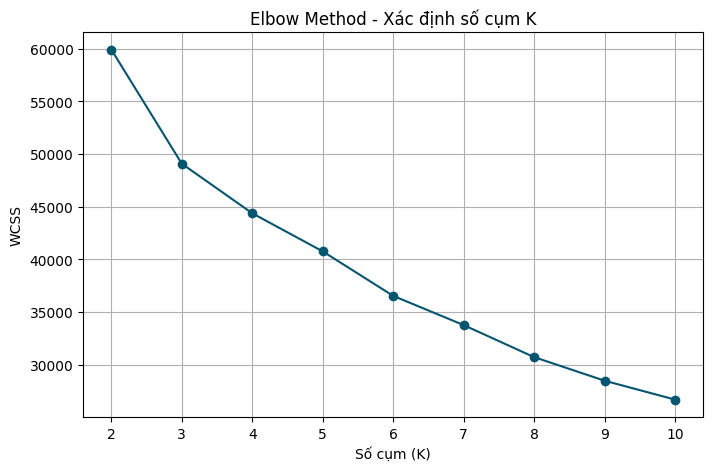

Silhouette Score cho K=4: 0.236


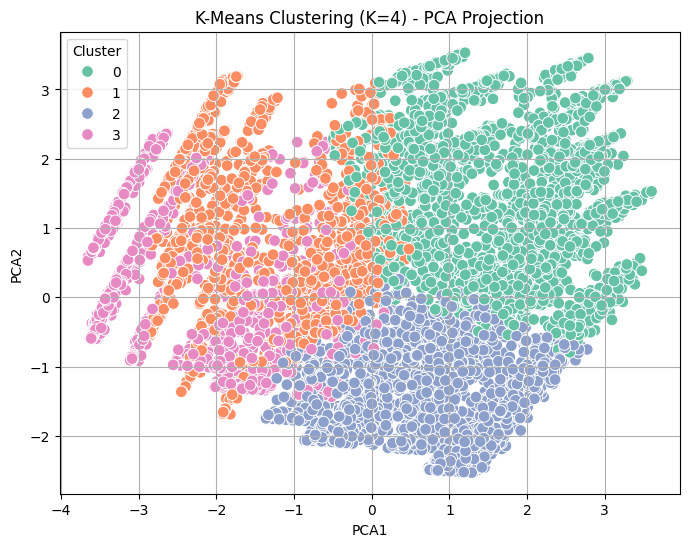

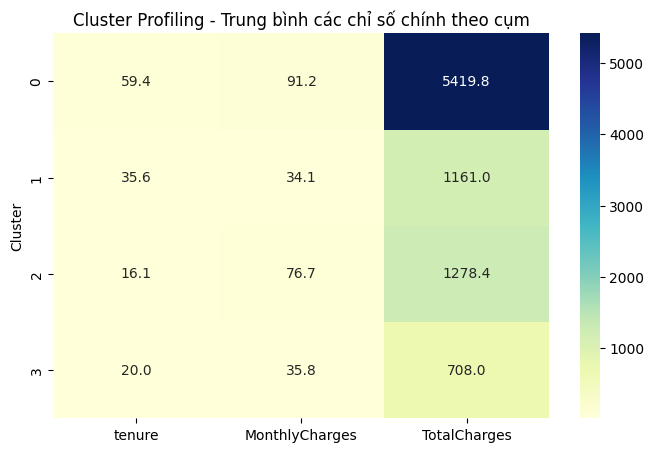

In [ ]:
# 1️⃣ Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 2️⃣ Tiền xử lý dữ liệu
df_kmeans = df.copy()

# Chuyển TotalCharges sang numeric
df_kmeans['TotalCharges'] = pd.to_numeric(df_kmeans['TotalCharges'], errors='coerce')
df_kmeans = df_kmeans.dropna(subset=['TotalCharges'])

# Chọn các cột liên quan đến hành vi sử dụng & chi tiêu
features = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling'
]

X = df_kmeans[features]

# 3️⃣ One-hot encode cho biến phân loại
X_encoded = pd.get_dummies(X, drop_first=True)

# 4️⃣ Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 5️⃣ Dùng Elbow method để chọn số cụm
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), wcss, marker='o', color='#065570')
plt.title("Elbow Method - Xác định số cụm K")
plt.xlabel("Số cụm (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# 👉 Sau khi xem biểu đồ, chọn K tối ưu (ví dụ K=4)
k_opt = 4

# 6️⃣ Huấn luyện K-Means
kmeans = KMeans(n_clusters=k_opt, random_state=42)
kmeans.fit(X_scaled)

# Gán nhãn cụm vào DataFrame
df_kmeans['Cluster'] = kmeans.labels_

# 7️⃣ Đánh giá Silhouette Score
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score cho K={k_opt}: {score:.3f}")

# 8️⃣ Giảm chiều để trực quan hóa (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_kmeans['PCA1'] = X_pca[:, 0]
df_kmeans['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_kmeans, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title(f"K-Means Clustering (K={k_opt}) - PCA Projection")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.grid()
plt.show()

# 9️⃣ Hồ sơ đặc trưng từng cụm (cluster profiling)
cluster_profile = df_kmeans.groupby('Cluster')[['tenure','MonthlyCharges','TotalCharges']].mean().round(1)
cluster_profile

# 10️⃣ Vẽ heatmap để xem sự khác biệt giữa các cụm
plt.figure(figsize=(8,5))
sns.heatmap(cluster_profile, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Cluster Profiling - Trung bình các chỉ số chính theo cụm")
plt.show()


Cluster 0 :Khách hàng trung thành cao, chi tiêu cao → nhóm khách VIP, dùng nhiều dịch vụ lâu dài
Cluster 1:Khách hàng mới, chi tiêu thấp, có thể rời bỏ sớm → nhóm tiềm năng cần chăm sóc.
Cluster 2:Khách hàng mới, chi tiêu cao → có thể là nhóm test dịch vụ, nên tập trung giữ chân.
Cluster 3: Khách hàng rời rạc, ít chi tiêu, không gắn bó lâu → nhóm ít giá trị, có thể tối ưu chi phí marketing.
